# Práctica 1

### Parte 2:  Convolución y filtros

In [2]:
from PIL import Image
import numpy as np

Descarga de la imagen

In [3]:
im_monkey = Image.open("monkey.png")
print(im_monkey.mode)
I = np.array(im_monkey)

L


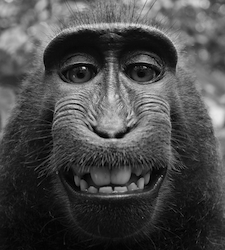

In [4]:
im_monkey

Función de convolución:

In [5]:
def Convol(I,k):
    kernel_size = k.shape[0]
    c_filas = 0
    M = np.empty(((I.shape[0] - kernel_size + 1) * (I.shape[1] - kernel_size + 1), k.size), dtype = int)
    for i in range(I.shape[0]- kernel_size + 1):
        for j in range(I.shape[1]- kernel_size +1):
            M[c_filas] = I[i:i + kernel_size, j:j + kernel_size].flatten()
            c_filas += 1
    
    S = np.matmul(M, k.flatten()).reshape((I.shape[0] - kernel_size + 1 , I.shape[1] - kernel_size + 1))
    return S

Aplicación del filtro paso bajo de 3 x 3

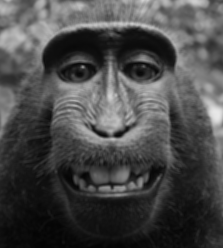

In [6]:
k1 = np.ones((3,3), dtype = int)
k1 = k1/np.sum(k1)
m1 = Convol(I,k1)
m1_int = np.uint8(m1)
im2_monkey = Image.fromarray(m1_int)
im2_monkey

Aplicación del filtro paso bajo de 11 x 11

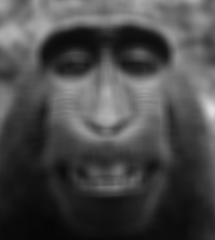

In [7]:
k2 = np.ones((11,11), dtype = int)
k2 = k2/np.sum(k2)
m2 = Convol(I,k2)
m2_int = np.uint8(m2)
im3_monkey = Image.fromarray(m2_int)
im3_monkey

Aplicación del filtro paso bajo de 21 x 21

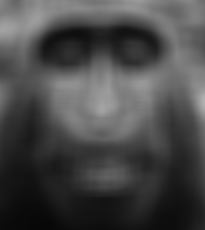

In [8]:
k3 = np.ones((21,21), dtype = int)
k3 = k3/np.sum(k3)
m3 = Convol(I,k3)
m3_int = np.uint8(m3)
im4_monkey = Image.fromarray(m3_int)
im4_monkey

Obtención del filtro paso alto a partir del paso bajo 3 × 3

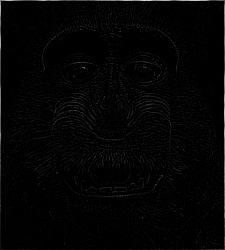

In [9]:
m1_pad = np.pad(m1,((k1.shape[0]//2,),(k1.shape[1]//2,)))
res = I - m1_pad
res = np.clip(res, 0 , 255)
res = np.uint8(res)

im5_monkey = Image.fromarray(res)
im5_monkey

Obtención del filtro paso alto a partir del paso bajo 11 × 11

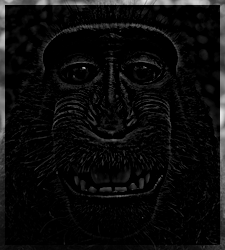

In [12]:
m2_pad = np.pad(m2,((k2.shape[0]//2,),(k2.shape[1]//2,)))
res = I - m2_pad
res = np.clip(res, 0 , 255)
res = np.uint8(res)

im6_monkey = Image.fromarray(res)
im6_monkey

Obtención del filtro paso alto a partir del paso bajo 21 × 21

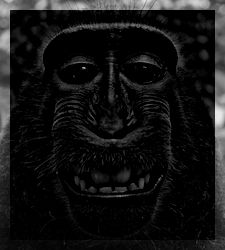

In [13]:
m3_pad = np.pad(m3,((k3.shape[0]//2,),(k3.shape[1]//2,)))
res = I - m3_pad
res = np.clip(res,0,255)
res = np.uint8(res)

im7_monkey = Image.fromarray(res)
im7_monkey

Filtro paso alto de Sobel

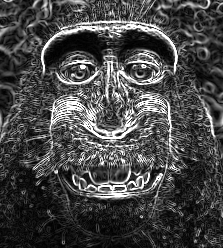

In [18]:
gx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
gy = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
m_gx = Convol(I,gx)
m_gy = Convol(I,gy)
G = np.sqrt(np.square(m_gx) + np.square(m_gy))
G = np.clip(G,0,255)
G = np.uint8(G)

im8_monkey = Image.fromarray(G)
im8_monkey

Filtro paso alto de Laplace

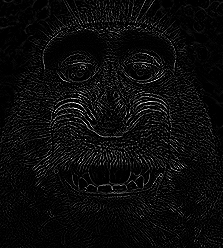

In [19]:
gx_laplace = np.array([[0,1,0],[1,-4,1],[0,1,0]])
m_gx_laplace = Convol(I,gx_laplace)
m_gx_laplace = np.clip(m_gx_laplace,0,255)
m_gx_laplace = np.uint8(m_gx_laplace)
im9_monkey = Image.fromarray(m_gx_laplace)
im9_monkey

Filtro paso alto de Prewit

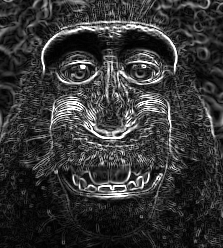

In [20]:
gx_prewit = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
gy_prewit = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

m_gx_prewit = Convol(I,gx_prewit)
m_gy_prewit = Convol(I,gy_prewit)

G_prewit = np.sqrt(np.square(m_gx_prewit) + np.square(m_gy_prewit))
G_prewit = np.clip(G_prewit,0,255)
G_prewit = np.uint8(G_prewit)

im10_monkey = Image.fromarray(G_prewit)
im10_monkey

Filtro paso alto de Roberts

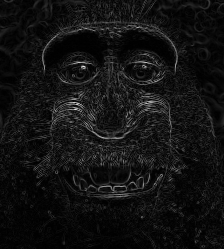

In [21]:
gx_roberts = np.array([[1,0],[0,-1]])
gy_roberts = np.array([[0,1],[-1,0]])
                       
m_gx_roberts = Convol(I,gx_roberts)
m_gy_roberts = Convol(I,gy_roberts)

G_roberts = np.sqrt(np.square(m_gx_roberts) + np.square(m_gy_roberts))
G_roberts = np.clip(G_roberts,0,255)
G_roberts = np.uint8(G_roberts)

im11_monkey = Image.fromarray(G_roberts)
im11_monkey